In [54]:
import numpy as np
import matplotlib.pyplot as plt

class Environment(object):
    def __init__(self, size, position, weight, goal):
        self.size = size
        self.position = position
        self.state = np.full((size, size), "O")
        self.weight = weight
        self.goal = goal
    
    def initialize(self):
        self.position = (0,0)
        # x y position of current agent
        x = self.position[0]
        y = self.position[1]
        # initialize agent's current position
        self.state[x][y] = "A"
        # initialize goal
        self.state[self.goal[0]][self.goal[1]] = "G"
        return

    def move(self, action):
        bound = [1,2,3,4]
        #  We will have different weighted probabilities base on the number of cases (2 or 3)
        r_1 = np.random.choice(bound, 1, p=[0.7, 0.1, 0.1, 0.1])
        min = 0
        max = self.size - 1
        # x y position of current agent
        x = self.position[0]
        y = self.position[1]
        self.state[x][y] = "O"

        # if out of bounds we will put a restriction, else keep next position
        if y - 1 < min:
            left = "X"
        else:
            left = self.state[x][y-1]
        if y + 1 > max :
            right = "X"
        else:
            right = self.state[x][y+1]
        if x+1 > max:
            down = "X"
        else:
            down = self.state[x+1][y]
        if x-1 < min:
            up = "X"
        else:
            up = self.state[x-1][y]

        if action == "r":
            if r_1 == 1:
                # stay original pos
                if right == "X":
                    self.state[x][y] = "A"
                else:
                    self.state[x][y+1] = "A"
                    self.position = (x,y+1)
            elif r_1 == 2:
                # down
                if down == "X":
                    self.state[x][y] = "A"
                else:
                    self.state[x+1][y] = "A"
                    self.position = (x+1,y)
            elif r_1 == 3:
                # up
                if up == "X":
                    self.state[x][y] = "A"
                else:
                    self.state[x-1][y] = "A"
                    self.position = (x-1,y)
            elif r_1 == 4:
                #left
                if left == "X":
                    self.state[x][y] = "A"
                else:
                    self.state[x][y-1] = "A"
                    self.position = (x,y-1)

        elif action == "l":
            if r_1 == 1:
                # stay original pos
                if left == "X":
                    self.state[x][y] = "A"
                else:
                    self.state[x][y-1] = "A"
                    self.position = (x,y-1)
            elif r_1 == 2:
                # down
                if down == "X":
                    self.state[x][y] = "A"
                else:
                    self.state[x+1][y] = "A"
                    self.position = (x+1,y)
            elif r_1 == 3:
                # up
                if up == "X":
                    self.state[x][y] = "A"
                else:
                    self.state[x-1][y] = "A"
                    self.position = (x-1,y)
            elif r_1 == 4:
                #right
                if right == "X":
                    self.state[x][y] = "A"
                else:
                    self.state[x][y+1] = "A"
                    self.position = (x,y+1)

        elif action == "u":
            if r_1 == 1:
                # stay original pos
                if up == "X":
                    self.state[x][y] = "A"
                else:
                    self.state[x-1][y] = "A"
                    self.position = (x-1,y)
            elif r_1 == 2:
                # left
                if left == "X":
                    self.state[x][y] = "A"
                else:
                    self.state[x][y-1] = "A"
                    self.position = (x,y-1)
            elif r_1 == 3:
                # right
                if right == "X":
                    self.state[x][y] = "A"
                else:
                    self.state[x][y+1] = "A"
                    self.position = (x,y+1)
            elif r_1 == 4:
                # down
                if down == "X":
                    self.state[x][y] = "A"
                else:
                    self.state[x+1][y] = "A"
                    self.position = (x+1,y)

        elif action == "d":
            if r_1 == 1:
                # stay original pos
                if down == "X":
                    self.state[x][y] = "A"
                else:
                    self.state[x+1][y] = "A"
                    self.position = (x+1,y)
            elif r_1 == 2:
                # left
                if left == "X":
                    self.state[x][y] = "A"
                else:
                    self.state[x][y-1] = "A"
                    self.position = (x,y-1)
            elif r_1 == 3:
                # right
                if right == "X":
                    self.state[x][y] = "A"
                else:
                    self.state[x][y+1] = "A"
                    self.position = (x,y+1)
            elif r_1 == 4:
                # up
                if up == "X":
                    self.state[x][y] = "A"
                else:
                    self.state[x-1][y] = "A"
                    self.position = (x-1,y)
        return self.position

    def simulate(self, action):
        current_column = self.position[1]
        weight = self.weight[current_column]
        i = 0
        while i < weight:
            self.move("u")
            i += 1
        
        result = self.move(action)
        if result == self.goal:
            return (1, result)

        return (0, result)
        
    def draw(self):
        print(self.state)


In [55]:
def q_policy(env, epsilon, alpha, gamma, episodes, q_table, task):
    actions = ["l","d","r","u"]
    steps_so_far = 0
    # store cumulative reward in every step
    cumulative = 0
    # store cumulative reward per goal
    cumulative_per_goal = 0
    # store cumulative reward when agent reaches the goal
    total_rewards = []
    # store cumulative rewards when goal is reach
    total_rewards_per_goal = []
    # store cumulative steps when agent reaches the goal
    total_steps = []
    next_state_max_q = 0
    env.initialize()
    while steps_so_far < episodes:
        current_pos = env.position
        # random probability
        prob = np.random.random()
        # if probability generated is less than epsilon, explore
        if prob <= epsilon:
            action = np.random.choice(actions, 1, p=[0.25, 0.25, 0.25, 0.25])
        # otherwise exploit, Epsilon-Greedy
        else:
            action = max(q_table[current_pos], key=q_table[current_pos].get)
        
        # if agent reaches the goal
        if env.simulate(action) == (1,(3,7)):
            cumulative += 100
            cumulative_per_goal += 100
            # update q value with reward beings 100
            q_table[current_pos][action[0]] += (alpha * (100 + (gamma * next_state_max_q - q_table[current_pos][action[0]])))
            total_rewards.append(cumulative)
            total_rewards_per_goal.append(cumulative_per_goal)
            total_steps.append(steps_so_far)
            # reset cumulative reward per goal
            cumulative_per_goal = 0
            # reset environment
            env.initialize()
            if task == "test":
                break
        else:
            cumulative -= 1
            cumulative_per_goal -= 1
            # x,y to store next state pos
            x = env.position[0]
            y = env.position[1]
            # optimal move for next state
            next_state_max_q = q_table[(x,y)][max(q_table[(x,y)])]
            # update q value with reward being -1
            q_table[current_pos][action[0]] += (alpha * (-1 + (gamma * next_state_max_q - q_table[current_pos][action[0]])))
        steps_so_far += 1
        
    if task == "train":
        plt.plot(total_steps, total_rewards)
        plt.title("Q POLICY")
        plt.xlabel("Number of episodes")
        plt.ylabel("Cumulative reward")
        plt.show()
        print("Training: In " + str(episodes) +  " episodes, average reward after reaching goal: " + str(sum(total_rewards_per_goal)/episodes))
    return q_table, cumulative

In [50]:
def sarsa_policy(env, epsilon, alpha, gamma, episodes, q_table, task):
    actions = ["l","d","r","u"]
    steps_so_far = 0
    # store cumulative reward in every step
    cumulative = 0
    # store cumulative reward per goal
    cumulative_per_goal = 0
    # store cumulative reward when agent reaches the goal
    total_rewards = []
    # store cumulative rewards when goal is reach
    total_rewards_per_goal = []
    # store cumulative steps when agent reaches the goal
    total_steps = []
    next_action = "none"
    next_state_next_action_q = 0
    env.initialize()
    while steps_so_far < episodes:
        current_pos = env.position
        # random probability
        prob_1 = np.random.random()
        prob_2 = np.random.random()
        # first iteration, when next action is none
        if next_action == "none":
            # if probability generated is less than epsilon, explore
            if prob_1 <= epsilon:
                action = np.random.choice(actions, 1, p=[0.25, 0.25, 0.25, 0.25])
            # otherwise exploit, Epsilon-Greedy
            else:
                action = max(q_table[current_pos], key=q_table[current_pos].get)
            # if probability generated is less than epsilon, explore
            if prob_2 <= epsilon:
                next_action = np.random.choice(actions, 1, p=[0.25, 0.25, 0.25, 0.25])
            # otherwise exploit, Epsilon-Greedy
            else:
                next_action = "none"
        else:
            # current action becomes the previous next action
            action = next_action
            # find new next_action
            if prob_2 <= epsilon:
                next_action = np.random.choice(actions, 1, p=[0.25, 0.25, 0.25, 0.25])
            # otherwise exploit, Epsilon-Greedy
            else:
                next_action = "none"
        # if agent reaches the goal
        if env.simulate(action) == (1,(3,7)):
            cumulative += 100
            cumulative_per_goal += 100
            # update q value with reward beings 100
            q_table[current_pos][action[0]] += (alpha * (100 + (gamma * next_state_next_action_q - q_table[current_pos][action[0]])))
            total_rewards.append(cumulative)
            total_rewards_per_goal.append(cumulative_per_goal)
            total_steps.append(steps_so_far)
            # reset cumulative reward per goal
            cumulative_per_goal = 0
            # reset environment
            env.initialize()
            # reset next_action for first iteration
            next_action = "none"
            if task == "test":
                break
        else:
            cumulative -= 1
            cumulative_per_goal -= 1
            # x,y to store next state pos
            x = env.position[0]
            y = env.position[1]
            # optimal move for next state, exploit, Epsilon-Greedy
            if next_action == "none":
                next_action = max(q_table[(x,y)], key=q_table[(x,y)].get)
            next_state_next_action_q = q_table[(x,y)][next_action[0]]
            # update q value with reward being -1
            q_table[current_pos][action[0]] += (alpha * (-1 + (gamma * next_state_next_action_q - q_table[current_pos][action[0]])))
        steps_so_far += 1
    
    if task == "train":
        plt.plot(total_steps, total_rewards)
        plt.title("SARSA POLICY")
        plt.xlabel("Number of episodes")
        plt.ylabel("Cumulative reward")
        plt.show()
        print("Training: In " + str(episodes) +  " episodes, average reward after reaching goal: " + str(sum(total_rewards_per_goal)/episodes))
    return q_table, cumulative

In [51]:
def expected_sarsa_policy(env, epsilon, alpha, gamma, episodes, q_table, task):
    actions = ["l","d","r","u"]
    steps_so_far = 0
    # store cumulative reward in every step
    cumulative = 0
    # store cumulative reward per goal
    cumulative_per_goal = 0
    # store cumulative reward when agent reaches the goal
    total_rewards = []
    # store cumulative rewards when goal is reach
    total_rewards_per_goal = []
    # store cumulative steps when agent reaches the goal
    total_steps = []
    next_state_max_q = 0
    env.initialize()
    while steps_so_far < episodes:
        current_pos = env.position
        # random probability
        prob = np.random.random()
        # if probability generated is less than epsilon, explore
        if prob <= epsilon:
            action = np.random.choice(actions, 1, p=[0.25, 0.25, 0.25, 0.25])
        # otherwise exploit, Epsilon-Greedy
        else:
            action = max(q_table[current_pos], key=q_table[current_pos].get)
        
        # if agent reaches the goal
        if env.simulate(action) == (1,(3,7)):
            cumulative += 100
            cumulative_per_goal += 100
            # update q value with reward beings 100
            q_table[current_pos][action[0]] += (alpha * (100 + (gamma * next_state_expected_value - q_table[current_pos][action[0]])))
            total_rewards.append(cumulative)
            total_rewards_per_goal.append(cumulative_per_goal)
            total_steps.append(steps_so_far)
            # reset cumulative reward per goal
            cumulative_per_goal = 0
            # reset environment
            env.initialize()
            if task == "test":
                break
        else:
            cumulative -= 1
            cumulative_per_goal -= 1
            # x,y to store next state pos
            x = env.position[0]
            y = env.position[1]
            # optimal move for next state
            next_state_max_q = q_table[(x,y)][max(q_table[(x,y)])]
            next_state_expected_value = calculate_expected(x, y, epsilon, q_table, actions)
            # update q value with reward being -1
            q_table[current_pos][action[0]] += (alpha * (-1 + (gamma * next_state_expected_value - q_table[current_pos][action[0]])))
        steps_so_far += 1
    if task == "train":
        plt.plot(total_steps, total_rewards)
        plt.title("EXPECTED SARSA POLICY")
        plt.xlabel("Number of episodes")
        plt.ylabel("Cumulative reward")
        plt.show()
        print("Training: In " + str(episodes) +  " episodes, average reward after reaching goal: " + str(sum(total_rewards_per_goal)/episodes))
    return q_table, cumulative

def calculate_expected(x, y, epsilon, q_table, actions):
    # random probability
    prob = np.random.random()
    # if probability generated is less than epsilon, explore
    next_state_probability = {action : epsilon/len(actions) for action in actions}
    # otherwise exploit, Epsilon-Greedy
    if prob > epsilon:
        action = max(q_table[(x,y)], key=q_table[(x,y)].get)
        next_state_probability[action] = 1 - epsilon

    action = max(q_table[(x,y)], key=q_table[(x,y)].get)
    next_state_q_val = [q_table[(x,y)][action] for action in actions]
    return sum([prob * q_val for prob,q_val in zip(next_state_probability.values(), next_state_q_val)])


Q POLICY


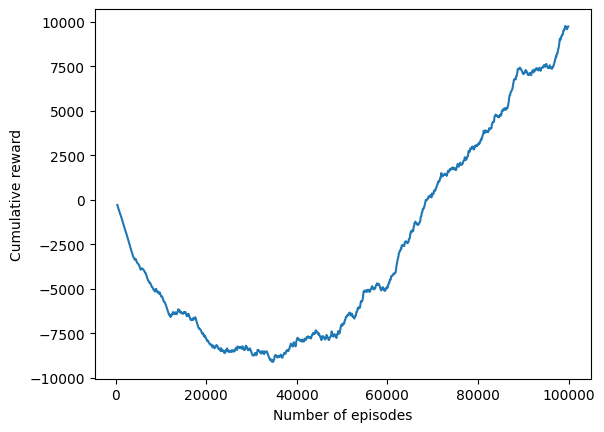

Training: In 100000 episodes, average reward after reaching goal: 0.09751
Testing: In 100 iterations, average reward after reaching goal: 25.36


In [41]:
print("Q POLICY")
# epsilon = 0.1
# alpha = 0.5
# gamma = 0.9
# episodes = 100000
weight = [0,0,0,1,1,1,2,2,1,0]
env = Environment(10, (0,0), weight,(3,7))

q_table = {}
# Initializa Q table
for i in range (0,11):
    for j in range (0,11):
        q_table[(i,j)] = {"l" : 0, "d" : 0, "r" : 0, "u" : 0}

training = q_policy(env, 0.1, 0.5, 0.9, 100000,q_table,"train")
total_rewards = []
num_iter = 100

for i in range(num_iter):
    testing = q_policy(env,-1,0.5,0.9,100000,training[0], "test")
    training = testing
    total_rewards.append(testing[1])

print("Testing: In " + str(num_iter) + " iterations, average reward after reaching goal: " + str(sum(total_rewards)/num_iter))


SARSA POLICY


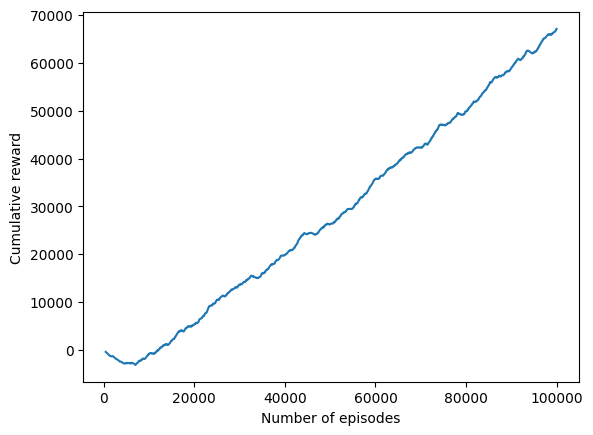

Training: In 100000 episodes, average reward after reaching goal: 0.67071
Testing: In 10 iterations, average reward after reaching goal: 60.9


In [43]:
print("SARSA POLICY")
# epsilon = 0.1
# alpha = 0.5
# gamma = 0.9
# episodes = 100000
weight = [0,0,0,1,1,1,2,2,1,0]
env = Environment(10, (0,0), weight,(3,7))

q_table = {}
# Initializa Q table
for i in range (0,11):
    for j in range (0,11):
        q_table[(i,j)] = {"l" : 0, "d" : 0, "r" : 0, "u" : 0}

training = sarsa_policy(env,0.1,0.5,0.9,100000,q_table,"train")
total_rewards = []
num_iter = 10

for i in range(num_iter):
    testing = sarsa_policy(env,-1,0.5,0.9,100000,training[0], "test")
    training = testing
    total_rewards.append(testing[1])

print("Testing: In " + str(num_iter) + " iterations, average reward after reaching goal: " + str(sum(total_rewards)/num_iter))


EXPECTED SARSA POLICY


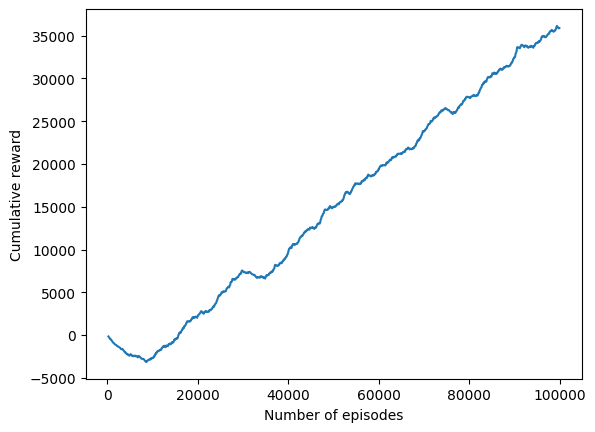

Training: In 100000 episodes, average reward after reaching goal: 0.35899
Testing: In 10 iterations, average reward after reaching goal: 47.9


In [44]:
print("EXPECTED SARSA POLICY")
# epsilon = 0.1
# alpha = 0.5
# gamma = 0.9
# episodes = 100000
weight = [0,0,0,1,1,1,2,2,1,0]
env = Environment(10, (0,0), weight,(3,7))

q_table = {}
# Initializa Q table
for i in range (0,11):
    for j in range (0,11):
        q_table[(i,j)] = {"l" : 0, "d" : 0, "r" : 0, "u" : 0}

training = expected_sarsa_policy(env,0.1,0.5,0.9,100000,q_table,"train")
total_rewards = []
num_iter = 10

for i in range(num_iter):
    testing = expected_sarsa_policy(env,-1,0.5,0.9,100000,training[0], "test")
    training = testing
    total_rewards.append(testing[1])

print("Testing: In " + str(num_iter) + " iterations, average reward after reaching goal: " + str(sum(total_rewards)/num_iter))


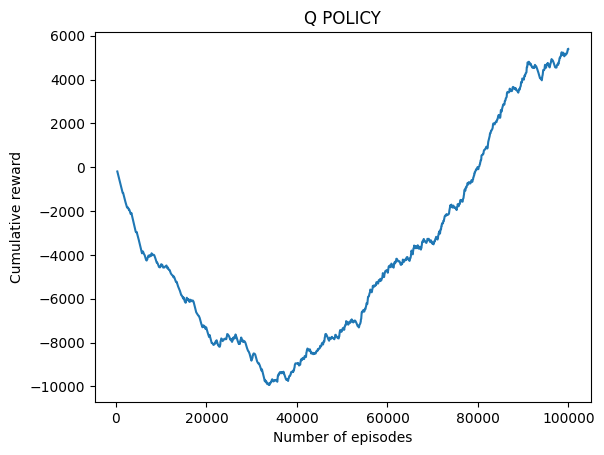

Training: In 100000 episodes, average reward after reaching goal: 0.05399
Testing: In 100 iterations, average reward after reaching goal: 36.99


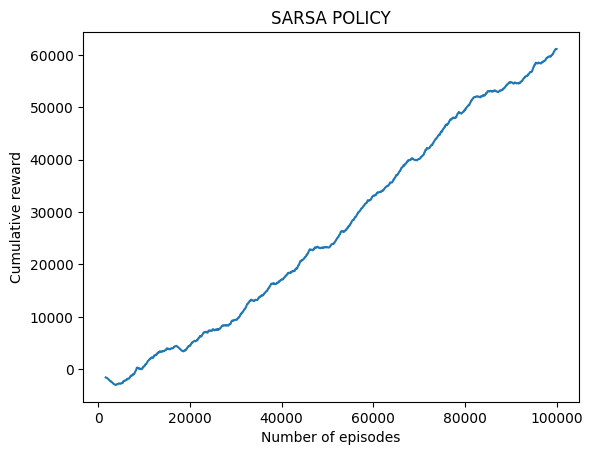

Training: In 100000 episodes, average reward after reaching goal: 0.61099
Testing: In 100 iterations, average reward after reaching goal: 67.33


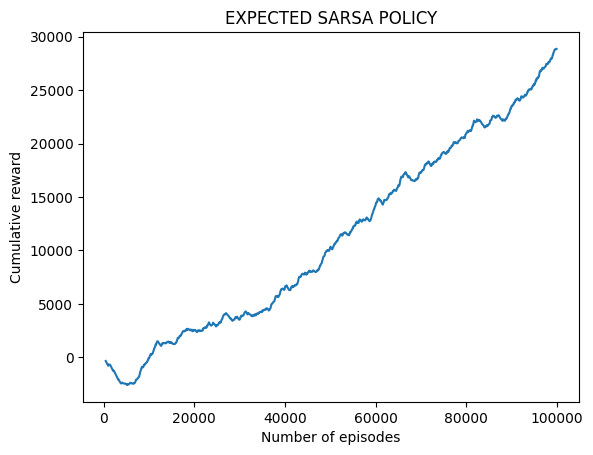

Training: In 100000 episodes, average reward after reaching goal: 0.28858
Testing: In 100 iterations, average reward after reaching goal: 49.62


In [53]:
# epsilon = 0.1
# alpha = 0.5
# gamma = 0.9
# episodes = 100000
weight = [0,0,0,1,1,1,2,2,1,0]
env = Environment(10, (0,0), weight,(3,7))

q_table = {}
# Initializa Q table
for i in range (0,11):
    for j in range (0,11):
        q_table[(i,j)] = {"l" : 0, "d" : 0, "r" : 0, "u" : 0}

training = q_policy(env, 0.1, 0.5, 0.9, 100000,q_table,"train")
total_rewards = []
num_iter = 100

for i in range(num_iter):
    testing = q_policy(env,-1,0.5,0.9,100000,training[0], "test")
    training = testing
    total_rewards.append(testing[1])

print("Testing: In " + str(num_iter) + " iterations, average reward after reaching goal: " + str(sum(total_rewards)/num_iter))

q_table = {}
# Initializa Q table
for i in range (0,11):
    for j in range (0,11):
        q_table[(i,j)] = {"l" : 0, "d" : 0, "r" : 0, "u" : 0}

training = sarsa_policy(env,0.1,0.5,0.9,100000,q_table,"train")
total_rewards = []

for i in range(num_iter):
    testing = sarsa_policy(env,-1,0.5,0.9,100000,training[0], "test")
    training = testing
    total_rewards.append(testing[1])

print("Testing: In " + str(num_iter) + " iterations, average reward after reaching goal: " + str(sum(total_rewards)/num_iter))

q_table = {}
# Initializa Q table
for i in range (0,11):
    for j in range (0,11):
        q_table[(i,j)] = {"l" : 0, "d" : 0, "r" : 0, "u" : 0}

training = expected_sarsa_policy(env,0.1,0.5,0.9,100000,q_table,"train")
total_rewards = []

for i in range(num_iter):
    testing = expected_sarsa_policy(env,-1,0.5,0.9,100000,training[0], "test")
    training = testing
    total_rewards.append(testing[1])

print("Testing: In " + str(num_iter) + " iterations, average reward after reaching goal: " + str(sum(total_rewards)/num_iter))


